In [1]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *
dataset = get_data('credit')
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
exp_clf101 = setup(data = data, target = 'default', session_id=786) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [2]:
compare_models(blacklist=['dt', 'svm', 'ridge', 'rf', 'qda', 'ada', 'gbc', 'lda', 'et', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,Logistic Regression,0.778600,0.650800,0.000600,0.075000,0.001100,0.000100,0.000100,0.300000
1,K Neighbors Classifier,0.750500,0.609900,0.180200,0.369300,0.242100,0.113400,0.124000,0.680000
2,Naive Bayes,0.365100,0.645700,0.902000,0.245500,0.385900,0.058500,0.122400,0.060000


In [3]:
t_model=tune_model('rf', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.828900,0.787100,0.348400,0.741000,0.474000,0.387300,0.426700,1.260000
1,0.822700,0.799000,0.351300,0.696600,0.467000,0.374300,0.405900,1.300000
2,0.822100,0.825100,0.382400,0.671600,0.487400,0.389400,0.412000,1.270000
3,0.822700,0.774000,0.362600,0.688200,0.475000,0.380400,0.408700,1.350000
4,0.822700,0.779500,0.351300,0.696600,0.467000,0.374300,0.405900,1.250000
5,0.823900,0.791800,0.359800,0.697800,0.474800,0.381700,0.412000,1.270000
6,0.820200,0.753600,0.334300,0.694100,0.451200,0.359100,0.393400,1.330000
7,0.830200,0.793500,0.356900,0.741200,0.481800,0.394800,0.432600,1.300000
8,0.821400,0.764900,0.354100,0.686800,0.467300,0.372900,0.402500,1.310000
9,0.813800,0.782400,0.359800,0.641400,0.461000,0.359000,0.381000,1.290000


In [6]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.362800,0.660200,0.917800,0.247000,0.389200,0.062400,0.133500,0.070000
1,0.338300,0.617900,0.900800,0.237500,0.375900,0.039700,0.089700,0.070000
2,0.381000,0.689800,0.937700,0.255200,0.401200,0.082000,0.170700,0.070000
3,0.372800,0.670000,0.917800,0.250000,0.393000,0.069400,0.144300,0.070000
4,0.363400,0.631600,0.900800,0.244800,0.385000,0.057000,0.119000,0.070000
5,0.362200,0.672700,0.926300,0.247900,0.391100,0.064800,0.140600,0.070000
6,0.388500,0.600000,0.824400,0.241500,0.373600,0.047800,0.085900,0.070000
7,0.358400,0.659400,0.915000,0.245300,0.386800,0.058300,0.126000,0.070000
8,0.355900,0.625200,0.878200,0.239400,0.376200,0.043900,0.091000,0.060000
9,0.367400,0.630400,0.900800,0.246100,0.386600,0.059700,0.123400,0.060000


In [7]:
dt_ensemble_through_ensemble = ensemble_model(nb, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.369700,0.651500,0.912200,0.248300,0.390300,0.065300,0.135900,4.260000
1,0.340900,0.617700,0.889500,0.236600,0.373800,0.037500,0.082700,4.080000
2,0.384100,0.696800,0.934800,0.255800,0.401700,0.083300,0.171300,4.190000
3,0.377800,0.666900,0.912200,0.250800,0.393400,0.071100,0.144700,4.220000
4,0.368400,0.641100,0.898000,0.245900,0.386100,0.059500,0.122200,4.090000
5,0.371600,0.662000,0.932000,0.251500,0.396100,0.073400,0.155800,4.110000
6,0.387800,0.613200,0.838500,0.243400,0.377300,0.052500,0.095900,4.080000
7,0.363400,0.652600,0.889500,0.243200,0.382000,0.053100,0.109300,4.070000
8,0.359000,0.620700,0.872500,0.239500,0.375800,0.044000,0.089900,4.090000
9,0.369900,0.626900,0.898000,0.246500,0.386800,0.060500,0.123800,4.060000


In [8]:
b1 = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.823300,0.000000,0.334300,0.715200,0.455600,0.366300,0.404100,16.940000
1,0.820800,0.000000,0.331400,0.700600,0.450000,0.358900,0.394900,14.640000
2,0.822100,0.000000,0.365400,0.682500,0.476000,0.380400,0.407400,14.620000
3,0.816400,0.000000,0.325800,0.676500,0.439800,0.345700,0.378800,14.570000
4,0.822700,0.000000,0.331400,0.713400,0.452600,0.363300,0.401400,15.000000
5,0.820200,0.000000,0.351300,0.681300,0.463600,0.368500,0.397800,14.860000
6,0.821400,0.000000,0.345600,0.693200,0.461200,0.368300,0.400400,14.650000
7,0.828900,0.000000,0.331400,0.759700,0.461500,0.378000,0.424100,14.400000
8,0.821400,0.000000,0.334300,0.702400,0.453000,0.362000,0.397700,14.810000
9,0.813800,0.000000,0.359800,0.641400,0.461000,0.359000,0.381000,14.770000


In [2]:
nb = create_model('nb')
svm = create_model('svm')
xgboost = create_model('xgboost')
lr= create_model('lr')
stack_models(estimator_list = [xgboost,svm,nb], meta_model = lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.778200,0.654800,0.000000,0.000000,0.000000,-0.001300,-0.013300,0.280000
1,0.778800,0.635800,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000
2,0.777600,0.683600,0.002800,0.250000,0.005600,0.000600,0.003500,0.310000
3,0.778800,0.658700,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000
4,0.778800,0.643300,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
5,0.778200,0.668900,0.000000,0.000000,0.000000,-0.001300,-0.013300,0.320000
6,0.778800,0.634400,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000
7,0.778800,0.656600,0.002800,0.500000,0.005600,0.003100,0.023800,0.300000
8,0.778800,0.633500,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
9,0.778700,0.638000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000


[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=123,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=0),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 LogisticRegression(C=1.0, class_weight=None

In [2]:
nb = create_model('nb')
rf = create_model('rf')
ada = create_model('ada')
ridge = create_model('ridge')
knn = create_model('knn')
lr= create_model('lr')
create_stacknet( estimator_list = [[nb,rf],[ada,ridge,knn]], meta_model = lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.778800,0.653800,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
1,0.778800,0.636800,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000
2,0.777600,0.682800,0.002800,0.250000,0.005600,0.000600,0.003500,0.280000
3,0.778800,0.656900,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000
4,0.778800,0.643400,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
5,0.778200,0.668500,0.000000,0.000000,0.000000,-0.001300,-0.013300,0.300000
6,0.778800,0.634300,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000
7,0.778800,0.656900,0.002800,0.500000,0.005600,0.003100,0.023800,0.290000
8,0.778800,0.633600,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000
9,0.778700,0.637600,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000


[[GaussianNB(priors=None, var_smoothing=1e-09),
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                         oob_score=False, random_state=123, verbose=0,
                         warm_start=False)],
 [AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                     n_estimators=50, random_state=123),
  RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                  max_iter=None, normalize=False, random_state=123, solver='auto',
                  tol=0.001),
  KNeighborsClassifier(algorithm='auto', leaf_size=30, met

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.732500,0.621300,0.422100,0.400500,0.411000,0.238100,0.238200,0.460000
1,0.723700,0.619900,0.430600,0.387800,0.408100,0.228500,0.229000,0.410000
2,0.740000,0.636100,0.450400,0.418400,0.433800,0.265400,0.265700,0.480000
3,0.715500,0.598400,0.385300,0.364600,0.374700,0.190700,0.190900,0.440000
4,0.737500,0.617500,0.402300,0.405700,0.404000,0.235600,0.235600,0.420000
5,0.735600,0.637600,0.461800,0.412700,0.435800,0.263900,0.264600,0.420000
6,0.723700,0.621000,0.436300,0.388900,0.411200,0.231500,0.232100,0.400000
7,0.738700,0.636500,0.453300,0.416700,0.434200,0.264700,0.265100,0.400000
8,0.726200,0.606200,0.390900,0.383300,0.387100,0.210800,0.210900,0.440000
9,0.721000,0.603000,0.388100,0.374300,0.381100,0.201100,0.201100,0.420000


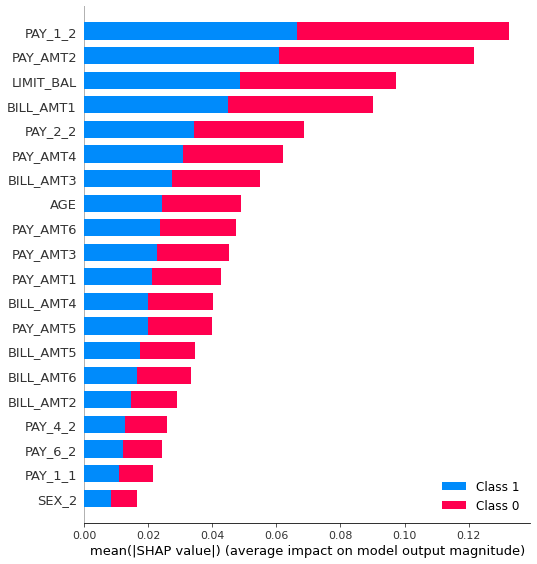

In [3]:
dt = create_model('dt')
interpret_model(estimator = dt)

In [4]:
calibrate_model(lr, method = 'sigmoid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Training time
0,0.778800,0.654800,0.000000,0.000000,0.000000,0.000000,0.000000,2.430000
1,0.778800,0.632800,0.000000,0.000000,0.000000,0.000000,0.000000,2.510000
2,0.778800,0.684300,0.000000,0.000000,0.000000,0.000000,0.000000,2.380000
3,0.778800,0.658100,0.000000,0.000000,0.000000,0.000000,0.000000,2.560000
4,0.778800,0.642700,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000
5,0.778800,0.669600,0.000000,0.000000,0.000000,0.000000,0.000000,2.520000
6,0.778800,0.634500,0.000000,0.000000,0.000000,0.000000,0.000000,2.550000
7,0.778800,0.656700,0.000000,0.000000,0.000000,0.000000,0.000000,2.420000
8,0.778800,0.633400,0.000000,0.000000,0.000000,0.000000,0.000000,2.380000
9,0.778700,0.638500,0.000000,0.000000,0.000000,0.000000,0.000000,2.390000


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=123,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                               

In [6]:
rf = create_model('rf')
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


In [7]:
finalize_model(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [8]:
predict_model(rf, data = data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,270000,2,1,2,34,0,0,2,0,0,...,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0,0,0.0
1,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0,0,0.2
2,360000,2,1,2,30,0,0,0,0,0,...,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0,0,0.0
3,20000,2,1,2,25,0,0,0,0,0,...,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0,0,0.0
4,70000,1,2,2,29,0,0,0,0,0,...,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,130000,1,3,2,45,0,0,-1,0,-1,...,390.0,1000.0,2522.0,0.0,390.0,390.0,390.0,0,0,0.2
22796,290000,2,1,2,29,0,0,0,0,-1,...,210989.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0,0,0,0.2
22797,210000,1,2,1,41,1,2,0,0,0,...,119494.0,0.0,5000.0,3600.0,2000.0,2000.0,5000.0,0,0,0.0
22798,550000,1,2,1,47,0,0,0,0,0,...,0.0,10000.0,20000.0,5000.0,0.0,0.0,0.0,0,0,0.2
